# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Chanin Nantasenamat

[*'Data Professor' YouTube channel*](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life **data science project** that you can include in your **data science portfolio**. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [ ]:
! wget https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2020-07-01 12:24:14--  https://github.com/dataprofessor/data/raw/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv [following]
--2020-07-01 12:24:15--  https://raw.githubusercontent.com/dataprofessor/data/master/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8363909 (8.0M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.cs

In [2]:
df = pd.read_csv('pubchem_fp_HER2_bioactivity_data_3class_pIC50.csv')

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2715,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2716,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2717,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2718,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [4]:
Y = df.pIC50
Y

0       6.522879
1       6.397940
2       7.000000
3       5.301030
4       7.000000
          ...   
2715    6.301030
2716    6.301030
2717    5.058986
2718    9.017729
2719    8.847712
Name: pIC50, Length: 2720, dtype: float64

### **3.3. Let's examine the data dimension**

In [5]:
X.shape

(2720, 881)

In [6]:
Y.shape

(2720,)

### **3.4. Remove low variance features**

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [8]:
X.shape

(2720, 155)

## **4. Data split (80/20 ratio)**

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [10]:
X_train.shape, Y_train.shape

((2176, 155), (2176,))

In [11]:
X_test.shape, Y_test.shape

((544, 155), (544,))

## **5. Building a Regression Model using Random Forest**

In [13]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5543253231364772

In [14]:
Y_pred = model.predict(X_test)
Y_pred1 = pd.DataFrame(Y_pred, columns=['Y_pred'])
Y_pred1

,Y_pred
0,7.375769
1,6.510641
2,5.611641
3,6.590084
4,5.340139
...,...
539,8.014466
540,6.098784
541,5.896552
542,6.895082


In [15]:
len(Y_pred)

544

In [16]:
Y_test.to_csv('Y_test.csv', index=False)

In [17]:
Y_test = pd.read_csv('Y_test.csv')
Y_test

,pIC50
0,5.275724
1,6.376751
2,5.655608
3,6.638272
4,4.988853
...,...
539,8.113509
540,5.008774
541,5.000000
542,6.853872


In [18]:
len(Y_test)

544

In [19]:
table = pd.concat([Y_test, Y_pred1], axis=1)
table

,pIC50,Y_pred
0,5.275724,7.375769
1,6.376751,6.510641
2,5.655608,5.611641
3,6.638272,6.590084
4,4.988853,5.340139
...,...,...
539,8.113509,8.014466
540,5.008774,6.098784
541,5.000000,5.896552
542,6.853872,6.895082


## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

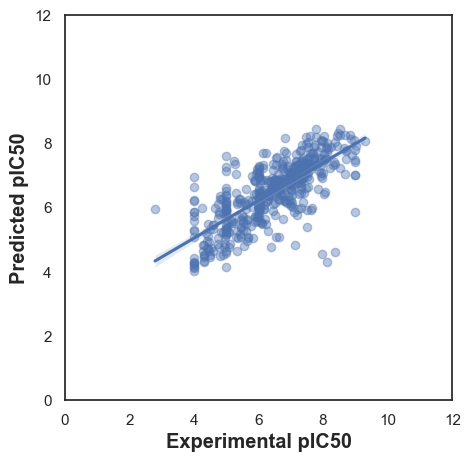

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(data=table, x='pIC50', y='Y_pred', scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()

In [23]:
XF = X[2718:2719]
Y_prediction = model.predict(XF)
Y_prediction

array([7.93442179])